<a href="https://colab.research.google.com/github/uumair327/natural_language_processing/blob/main/NLP06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rule-Based POS Tagging

In [7]:
from nltk import pos_tag
from nltk import RegexpParser
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [8]:
# Sample text
text = "learn php by your own and make study easy".split()

In [9]:
# After Split
print("After Split:", text)

After Split: ['learn', 'php', 'by', 'your', 'own', 'and', 'make', 'study', 'easy']


In [10]:
# Apply POS tagging
tokens_tag = pos_tag(text)
print("After Token:", tokens_tag)

After Token: [('learn', 'NN'), ('php', 'NN'), ('by', 'IN'), ('your', 'PRP$'), ('own', 'JJ'), ('and', 'CC'), ('make', 'VB'), ('study', 'NN'), ('easy', 'JJ')]


In [11]:
# Define patterns for chunking
patterns = """mychunk:{<NN.?><VB.*><JJ.*><CC>?}"""
chunker = RegexpParser(patterns)

In [12]:
# Print Regex pattern
print("After Regex:", chunker)

After Regex: chunk.RegexpParser with 1 stages:
RegexpChunkParser with 1 rules:
       <ChunkRule: '<NN.?><VB.*><JJ.*><CC>?'>


In [13]:
# Perform chunking
output = chunker.parse(tokens_tag)
print("After Chunking", output)


After Chunking (S
  learn/NN
  php/NN
  by/IN
  your/PRP$
  own/JJ
  and/CC
  make/VB
  study/NN
  easy/JJ)


Example 2

In [22]:
import nltk
from nltk.draw.util import CanvasFrame
from nltk.draw import TreeWidget
from IPython.display import Image, display
import matplotlib.pyplot as plt

In [23]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
# Sample text
text = "learn php by your own"

In [25]:
# Tokenization
tokens = nltk.word_tokenize(text)
print(tokens)


['learn', 'php', 'by', 'your', 'own']


In [26]:
# POS tagging
tag = nltk.pos_tag(tokens)
print(tag)

[('learn', 'NN'), ('php', 'NN'), ('by', 'IN'), ('your', 'PRP$'), ('own', 'JJ')]


In [27]:
# Define grammar for chunking
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)

In [28]:
# Perform chunking
result = cp.parse(tag)
print(result)

(S (NP learn/NN) (NP php/NN) by/IN your/PRP$ own/JJ)


Example 3

In [35]:
from collections import Counter
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Sample text
text = "We should follow all traffic rules, we should not disobey the rules."

# Convert text to lowercase
lower_case = text.lower()

# Tokenize the text
tokens = nltk.word_tokenize(lower_case)

# Apply POS tagging
tags = nltk.pos_tag(tokens)

# Count the occurrences of each POS tag
counts = Counter(tag for word, tag in tags)

# Print the counts
print(counts)


Counter({'PRP': 2, 'MD': 2, 'VB': 2, 'DT': 2, 'NNS': 2, 'NN': 1, ',': 1, 'RB': 1, '.': 1})


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Example plot

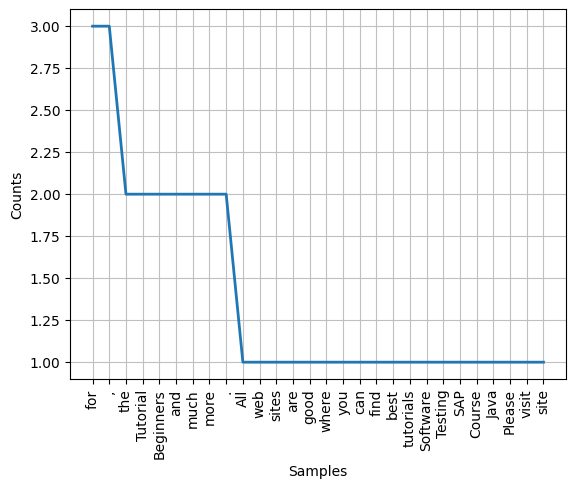

In [36]:
import nltk
import matplotlib.pyplot as plt

# Sample text
a = "All web sites are good where you can find the best tutorials for Software Testing Tutorial, SAP Course for Beginners, Java Tutorial for Beginners, and much more. Please visit the site and much more."

# Tokenize the text
words = nltk.word_tokenize(a)

# Calculate frequency distribution
fd = nltk.FreqDist(words)

# Plot the frequency distribution
fd.plot()

# Show the plot
plt.show()

Stochastic POS Tagging

In [37]:
import nltk
from nltk.corpus import treebank
from nltk.tag import hmm

In [38]:
# Download necessary NLTK data
nltk.download('treebank')
nltk.download('punkt')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
# Load a tagged corpus for training
train_sents = treebank.tagged_sents()[:3000]  # Use a subset for training

In [40]:
# Initialize and train the HMM tagger
trainer = hmm.HiddenMarkovModelTrainer()
tagger = trainer.train(train_sents)


In [41]:
# Sample text for tagging
text = "All web sites are good where you can find the best tutorials for Software Testing Tutorial, SAP Course for Beginners. Java Tutorial for Beginners and much more. Please visit the site and much more."


In [42]:
# Tokenize the text
tokens = nltk.word_tokenize(text)

In [44]:
# Perform POS tagging using the trained HMM tagger
tagged_tokens = tagger.tag(tokens)

In [45]:
# Print the tagged tokens
print(tagged_tokens)


[('All', 'DT'), ('web', 'NN'), ('sites', 'NNS'), ('are', 'VBP'), ('good', 'JJ'), ('where', 'WRB'), ('you', 'PRP'), ('can', 'MD'), ('find', 'VB'), ('the', 'DT'), ('best', 'JJS'), ('tutorials', 'NNS'), ('for', 'IN'), ('Software', 'NNP'), ('Testing', 'NNP'), ('Tutorial', 'NNP'), (',', 'NNP'), ('SAP', 'NNP'), ('Course', 'NNP'), ('for', 'NNP'), ('Beginners', 'NNP'), ('.', 'NNP'), ('Java', 'NNP'), ('Tutorial', 'NNP'), ('for', 'NNP'), ('Beginners', 'NNP'), ('and', 'NNP'), ('much', 'NNP'), ('more', 'NNP'), ('.', 'NNP'), ('Please', 'NNP'), ('visit', 'NNP'), ('the', 'NNP'), ('site', 'NNP'), ('and', 'NNP'), ('much', 'NNP'), ('more', 'NNP'), ('.', 'NNP')]
